In [57]:
# Jupyter notebook specific 
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

# TO be used as an asignment for CS-237
# @Author: Kai Bernardini (kaidb@bu.edu)
# Due Date: TBD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import seed, randint, uniform
from collections import Counter

In [58]:
Image(url = "https://s-media-cache-ak0.pinimg.com/736x/17/8c/bd/178cbd337399c89c20ded27b4da6c2d0.jpg")

# CS-237 Lab 1 
- What this lab covers:
    - Basic introduction to Monte Carlo Simulation.
    - Basic introduction to computational tools in probability (using python!)



# What is Python and who uses it?
- Python is a powerful open source general purpose programing language.
- Open source means all of the source code is public.
- Python has a massive community built around sharing code and ideas. 
- It uses simple syntax making it an excellent choice for a first programing language.
- Python is leveraged by many companies  to build complex web applications including. 
    - Disney, Dreamworks, Lucasfilm and many more use python to coordinate massive computer clusters to render blockbuster movies. 
- Is regarded by many as the swiss army knife of machine learning (statistics/data science) 
- More examples at https://www.python.org/about/success/


# Anaconda Distribution of Python 
- Download from https://www.continuum.io/downloads
    - Make sure its python 3! 
    - Be sure to pick the correct Oppperating System (O.S.) (IE Windows, MAC OS, (Linux?)

# Starting Jupyter 
- Open a Terminal 
    - For MAC OS, open your Applications folder, then open the Utilities folder. Open the Terminal application. You may want to add this to your dock.
    - For Windows, simply search for CMD and run the result
- In the terminal run $\texttt{jupyter notebook}$
- This will bring you to the home page. 
- Click new and then click python3 to create a new Ipython3 notebook.
- If you do not want to use Jupyter and would rather develop your code in a usual IDE, type $\texttt{spyder}$ in the command prompt instead. 
    - Alternatively, use the Anaconda Navigator that will be installed in folder anaconda was installed to. 


# Typesetting using $\LaTeX$
- You can change the cell type in Jupyter notebook to execute Latex Commands. 
- Simply put math equations in between two dollar signs 

# Plotting in Python
- We will be using Matplotlib for plotting and graphing. 

In [59]:
import matplotlib.pyplot as plt # plt is how we refer to plotting
import matplotlib as mpl 
import seaborn as sns  # Fancy plotting 
#from datetime import datetime 
%matplotlib inline


# Scatter plotting
- Use the scatter function to plot a list of x values and the associated y values

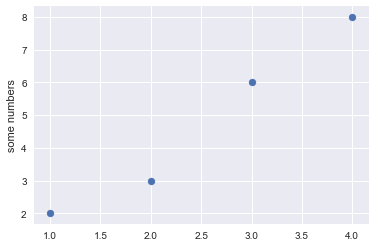

In [60]:
# Scatter plit take
               # X values  # Y values 
plt.scatter([1,2,3,4], [2,3,6,8])
plt.ylabel('some numbers')
plt.show()

# Plotting 
- Use the plot function to plot the curve through the ordered list of x values and y values

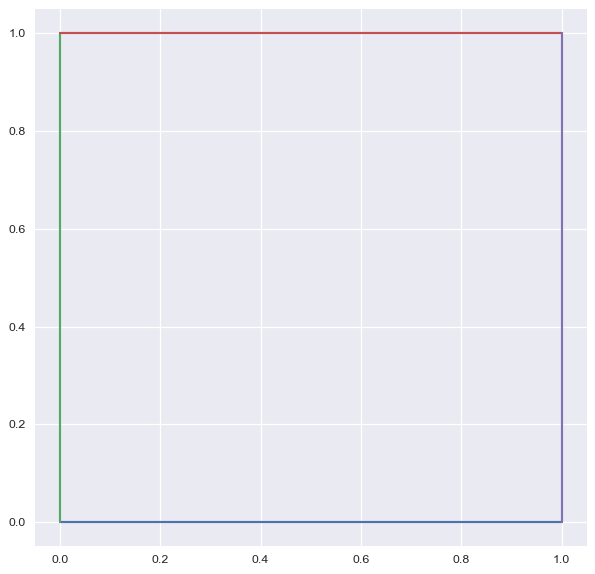

In [61]:
# EXAMPLE: Plotting a square via lines 
plt.figure(num=None, figsize=(8, 8), dpi=89, facecolor='w', edgecolor='k')
plt.plot([0,1],[0,0]) # Line connecting (0,0) to (1,0)
plt.plot([0,0],[0,1]) # Line connecting (0,0) to (0,1)
plt.plot([0,1],[1,1]) # Line connecting (0,1) to (1,1)
plt.plot([1,1],[0,1]) # Line connecting (1,0) to (1,1)

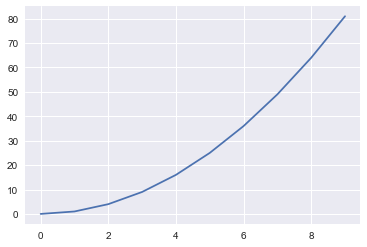

In [62]:
x = [i for i in range(10)]
y = [i**2 for i in x]
plt.plot(x,y)
plt.show()

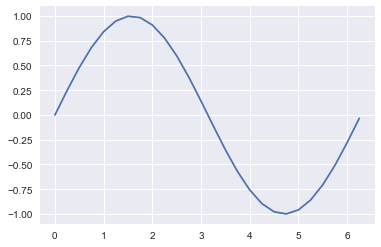

In [63]:
x=np.arange(0,2*np.pi,.25)
y=np.sin(x)
plt.plot(x,y)

# Problem 2
Read and understand the function $\texttt{dieRoll(n_trials)}$, that simulates the experiment of rolling a fair, six sided die $\texttt{n_trials}$ times. 
- IE, for each iteration, $0<i<\texttt{n_trials}$, $X_i \in_{R} \{1,2,3,4,5,6\}$. 
- By definition, we know that for each experiment $X_i$, $$P[X_i = k]= 1/6$$ for $k\in \{1,2,3,4,5,6\}$
- In English, that means the probability of rolling a 1 is the same as rolling a 2, is the same as rolling a 3...etc 
- If we record the outcome for a large number of experiments, we would expect the number of outcomes to be evenly distributed. In other words, for a large number of trials, we would expect $$\frac{\text{number of times we observed a } k}{\texttt{n_trials}} \approx \frac{1}{6}$$ for $k\in \{1,2,3,4,5,6\}$
- In this problem, you will confirm this intuition by using $\texttt{dieRoll}$  to create a numpy vector of results. 
- You will then count the number of times each outcome occurred. (You might find python's Counter function useful)
- Then finally, normalize your results by dividing the number of times each outcome occurred by $\texttt{num_trials}$
- Plot the results using a bar graph. 

In [64]:
def dieRoll(n_trials = 10000, seed=-1):
    """
    - Simulates rolling a fair die n_trials times. IE, a number is selected from 
    - (1,2,3,4,5,6) with equal probability n_trials times. By default, n_trials is set to 10000
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument for randint determines the shape of the result. In this case, we only need
    - a one dimensional array ( a list)
    """
    trials_and_results = randint(1,7,(n_trials)) 
    return trials_and_results

example_trials = dieRoll() # 

[0.1609, 0.1697, 0.159, 0.1699, 0.1691, 0.1714] 1.0


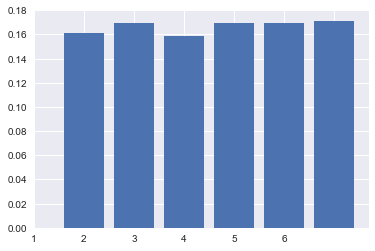

In [65]:
# SOLUTION
def single_die_hist(results):
    """
    - Estimates the probability mass function (PMF) for the outcome of rolling a single, fair die.
    @param: results -a numpy array indexed by trial number starting at trial 0 and ending at trial len(results)-1
    - plots the mpirical estimate of the PMF
    """
    n_trials = len(results)
    # Counter is a useful method for summarizing counts in a list 
    sumary = Counter(results)
    possible_rolls = [i for i in range(1,7)]
    fin = [ sumary[i]/n_trials for i in possible_rolls]
    print(fin, sum(fin))
    plt.bar(possible_rolls, fin )
    plt.xticks(range(7), possible_rolls)
    plt.show()
    
single_die_hist(example_trials)

[ 0.1609  0.1697  0.159   0.1699  0.1691  0.1714]


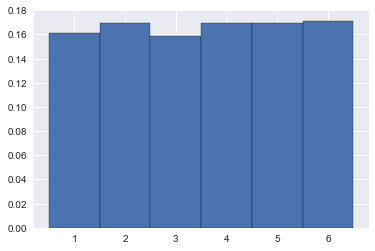

In [66]:
def alt_single_die_hist(results):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # I don't like doing it this way, because I find the histogram function 
    # counter intuitive with the way it specifies the number of bins. 
    # For a problem where you know the indicies, you can get away without using it. 
    # However, sometimes you can get lucky and just pick 'auto' 
    # The way you would get thi
    n,bins, patches = ax.hist(results,bins=np.arange(.5,7.5,1), normed = True, edgecolor='black' )
    print(n)
    fig.canvas.draw()
    possible_rolls = [i for i in range(1,7)]
    #plt.xticks(range(1,7), possible_rolls)
    plt.show()
alt_single_die_hist(example_trials)
    
        

# Motivation for simulation
- For the case of a fair die, the distribution is very easily computed. In general, it is very difficult to write down a closed form solution for the distribution of real world events. This is where simulation comes into play-- instead of mathematically computing the distribution explicitly, you can use this method of repeating experiments, and recording outcomes to understand the probabilistic rules governing some real world event. 
- As a motivating example, you will now do the same thing you did in the previous problem, but with a new experiment: instead of rolling one die and recording the value, you will simulate rolling $n$ dies and recording their sum. For example, if $n=2$ and  the first die shows up as a 3, and the second die shows up as a 1, the sum (and the value we record) would be 4. 
- Complete the two functions stubs below

In [67]:
# Hint, use help() on randint
# You can generate random lists of numbers with one line of code
# This function should look very similar to rollDie()

def roll_and_add_Dice(n_dice ,n_trials = 10000):
    """
    - Perform the trials
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument determins the shape of the result. In this case, we only need
    - a one dimensional array ( a list)
    """
    pass

In [69]:
# Solution
def roll_and_add_Dice(n_dice ,n_trials = 10000):
    """
    - Perform the trials
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument determins the shape of the result. In this case, we only need
    - a one dimensional array ( a list)
    """
    trials_and_results = randint(1,7,(n_dice, n_trials))
    print(trials_and_results.shape)
    acum =  np.zeros(n_trials)
    for i in range(len(trials_and_results)):
        acum += trials_and_results[i]
    return acum
    

example_multi_trial = roll_and_add_Dice(2)
example_multi_trial

(2, 10000)


array([  5.,   7.,   8., ...,  12.,   9.,   8.])

In [ ]:
def diceHist(results):
    """
    - Estimates the probability mass function (PMF) for the outcome of rolling a single, fair die.
    @param: results -a numpy array indexed by trial number starting at trial 0 and ending at trial len(results)-1
    - plots the mpirical estimate of the PMF
    """
    pass

In [ ]:
# Solution 
def diceHist(results):
    """
    - Estimates the probability mass function (PMF) for the outcome of rolling a single, fair die.
    @param: results -a numpy array indexed by trial number starting at trial 0 and ending at trial len(results)-1
    - plots the mpirical estimate of the PMF
    """
    n_trials = len(results)
    multi_die_range = range( int(min(results)), int(max(results))+1)
    # Counter is a useful method for summarizing counts in a list 
    sumary = Counter(results)
    possible_rolls = [i for i in multi_die_range]
    fin = [ sumary[i]/n_trials for i in possible_rolls]
    print(fin, sum(fin))
    plt.bar(possible_rolls, fin )
    plt.xticks(multi_die_range, possible_rolls)
    plt.show()
    return fin
diceHist(example_multi_trial)

In [ ]:
def coinFlip(p):
    """Simple Bernoulli trial """
    return uniform(0,1) < p

In [ ]:
def geometricFlip(p):
    count = 0
    while True:
        count +=1
        if uniform(0,1) < p:
            return count
    return -1 # there was an error 

geometricFlip(.5)

In [ ]:
def geoHist(p, n_trials = 10000 ):
    results = [geometricFlip(p) for i in range(n_trials)]
    flip_range = range( int(min(results)), int(max(results))+1)
    # slight modification, since we might not see all values 
    sumary = Counter(results)
    possible_outcomes = [i for i in sorted(sumary.keys())]
    fin = [ sumary[i]/n_trials for i in possible_outcomes]
    print(fin, sum(fin))
    plt.bar(possible_outcomes, fin )
    plt.xticks(flip_range, possible_outcomes)
    plt.show()
geoHist(.5)

In [ ]:
def randomPlane_plot(num_points):
    x = uniform(0,1,(num_points))
    y = uniform(0,1,(num_points))
    plt.scatter(x,y, marker='x', c='red')
    plt.show()
[randomPlane_plot(100) for i in range(10)]

In [ ]:
def coinFlip(p):
    """Simple Bernoulli trial """
    return uniform(0,1) < p

In [ ]:
def geometricFlip(p):
    count = 0
    while True:
        count +=1
        if uniform(0,1) < p:
            return count
    return "Something went wrong!"

geometricFlip(.5)

In [ ]:
randint(2)

In [ ]:
counter = 1
while randint(2)!= 1:
    counter += 1
counter